# LLEPE Tutorial - Getting started
## Introduction
In this notebook, you will learn how to use LLEPE to fit thermodynamic parameters to experimental data and explore how well the parameters fit.
## Installation
Create a conda environment with the following command. The environment name in this example is "thermo_env". <br/> 
```$ conda create --name thermo_env python=3.7```<br/>
Then run the following line to activate the environment

```$ conda activate thermo_env```

In your terminal run<br/>
```$ git clone https://xgitlab.cels.anl.gov/summer-2020/parameter-estimation.git```<br/>
Navigate into the folder with <br/>
```$ cd parameter-estimation```<br/>
And run <br/>
```pip install -e.```<br/>

## Moving neccessary files for example

Copy and paste the xml file named 'elementz.xml' from the 'data/xmls' folder to the Cantera data file located in 'Anaconda3/envs/thermo_env/Lib/site-packages/cantera' 

## Import and instantiate LLEPE

First, you will need to import the package and instantiate LLEPE with a few parameters.

In [1]:
from llepe import LLEPE
opt_dict = {'Nd(H(A)2)3(org)_h0': {'upper_element_name': 'species',
                              'upper_attrib_name': 'name',
                              'upper_attrib_value': 'Nd(H(A)2)3(org)',
                              'lower_element_name': 'h0',
                              'lower_attrib_name': None,
                              'lower_attrib_value': None,
                              'input_format': '{0}',
                              'input_value': -4.7e6}}
llepe_parameters = {'exp_data': '../../data/csvs/Nd_exp_data.csv',
                       'phases_xml_filename': '../../data/xmls/twophase.xml',
                       'opt_dict': opt_dict,
                       'phase_names': ['HCl_electrolyte', 'PC88A_liquid'],
                       'aq_solvent_name': 'H2O(L)',
                       'extractant_name': '(HA)2(org)',
                       'diluant_name': 'dodecane',
                       'complex_names': ['Nd(H(A)2)3(org)'],
                       'extracted_species_ion_names': ['Nd+++'],
                       'aq_solvent_rho': 1000.0,
                       'extractant_rho': 960.0,
                       'diluant_rho': 750.0}
estimator = LLEPE(**llepe_parameters)

### Parameters explanation 

####  exp_csv_filename

exp_csv_filename is the file name for the csv containing experimental data. <br/>
Let us get the pandas dataframe created by LLEPE.

In [2]:
estimator.get_exp_df()

,h_i,h_eq,z_i,z_eq,Nd_aq_i,Nd_aq_eq,Nd_d_eq,Nd_org_eq
0,0.01,0.088304,1,0.921696,0.050001,0.0239,1.0921,0.026101
1,0.01,0.105094,1,0.904906,0.099998,0.0683,0.4641,0.031698
2,0.01,0.109017,1,0.900983,0.150006,0.1170,0.2821,0.033006
3,0.01,0.106012,1,0.903988,0.200004,0.1680,0.1905,0.032004
4,0.01,0.118934,1,0.891066,0.300011,0.2637,0.1377,0.036311


The rows are for experiments, and the columns are for the measured quantaties. <br/>
LLEPE is looking for the ordering of these columns so it is important your experimental file has this ordering. Column names do not matter.<br/>
Below is a table explaining the meaning of the column headers and the needed column order.<br/>
If you have more than one rare earth element, append the data to the end in the same order (aq_i, aq_eq, d_eq)

| Order | Column     | Meaning                                                            |
|-------|------------|--------------------------------------------------------------------|
| 0     | h_i        | Initial Concentration of H+ ions (mol/L)                           |
| 1     | h_eq       | Equilibrium concentration of H+ ions (mol/L)                       |
| 2     | z_i        | Initial concentration of extractant (mol/L)                        |
| 3     | z_eq       | Equilibrium concentration of extractant (mol/L)                    |
| 4     | \{RE\}\_aq_i  | Initial concentration of RE ions (mol/L)                           |
| 5     | \{RE\}\_aq_eq | Equilibrium concentration of RE ions in aqueous phase (mol/L)      |
| 6     | \{RE\}\_d_eq  | Equilibrium Ratio between amount of RE atoms in organic to aqueous |

#### phases_xml_filename

This is the xml file containing information to be loaded into Cantera, the thermodynamic modeling package. <br/>
Please see parameter-estimation/data/xmls for file examples. <br/>
We can explore what has been loaded.

In [3]:
print(estimator.get_phases())

[<cantera.composite.Solution object at 0x00000278E83A15F8>, <cantera.composite.Solution object at 0x00000278E83A1CF8>]


It is a list of two Cantera solutions so we will dig in a little further and see what species these solutions contain.

In [4]:
for phase in estimator.get_phases():
    print(phase.name)
    print(phase.species_names)

HCl_electrolyte
['H2O(L)', 'H+', 'OH-', 'Cl-', 'Nd+++']
PC88A_liquid
['(HA)2(org)', 'dodecane', 'Nd(H(A)2)3(org)']


You can explore Cantera solutions further by visiting https://cantera.org/ and seeing Cantera's documentation.

#### opt_dict

This is a dictionary that contains the information about what species and what thermodynamic properties are to be modified.<br/> 
The number after the thermodynamic property is the initial guess for the optimizer. <br/> 
In this example, we chose to optimize the standard enthalpy (h0) of the neodymium-PC88A complex ('Nd(H(A)2)3(org)') and give it an initial guess of -4.7e6. Thus, <br/> 
```python 
opt_dict={'Nd(H(A)2)3(org)': {'h0': -4.7e6}}```

Say we wanted to also modify the extractant ('(HA)2(org)'), but this time change both the standard enthalpy (h0) and the molar volume (molarVolume), then the dictionary would be
```python 
opt_dict={'Nd(H(A)2)3(org)': {'h0': -4.7e6, 'molarVolume':1.01},
               '(HA)2(org)': {'h0': -4.7e6, 'molarVolume':1.01}}```

#### phase_names

This a list of the phase names in the xml file and can be found in the field phase id.

#### Names and rhos

| Parameter           | Meaning                                      | Example value     |
|---------------------|----------------------------------------------|-------------------|
|     aq_solvent_name |             Name of solvent in aqueous phase | 'H2O(L)'          |
|     extractant_name | Name of extractant in organic phase          | '(HA)2(org)'      |
|        diluant_name | Name of diluant in organic phase             | 'dodecane'        |
|        complex_name | Name of rare earth complex in organic phase  | 'Nd(H(A)2)3(org)' |
| rare_earth_ion_name | Name of rare earth ion name in aqueous phase | 'Nd+++'           |
|                rhos | Density of species (g/L)               | 1000 for 'H2O(L)' |

For the variables containing "rho", these parameters can be left "None", and molecular weight and molar volume will be used to calculate density.<br/> However, molar volume values may be wrong and mess up calculations so it is recommended to find density values and replace the default values.

## Fitting thermodynamic properties to data

Now that the thermodynamic properties have been set, we now need to set up the optimizer. <br/> The default optimizer is from scipy.optimize.minimize with the arguments below. The optimizer optimizes a value multiplied by the initial guess. <br/> Say $x$ is the variable controlled by the minimizer, the value that is entering the objective function is $x\times\mathrm{Guess\,value}$. So for our case, the values tested are $(4.6\times 10^6)x$. This is more important for bounds and constraints.

In [5]:
minimizer_kwargs = {"method": 'SLSQP',
                    "bounds": [(1e-1, 1e1)],
                    "constraints": (),
                    "options": {'disp': True, 
                                'maxiter': 1000, 
                                'ftol': 1e-6}}

With the minimizer arguments defined, we can perform our fit.<br/>
This minimizes the log mean squared error between the predicted and experimental Distribution ratio (D).

In [6]:
est_enthalpy, obj_value = estimator.fit()
print(est_enthalpy)
print(obj_value)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.025193288852542232
            Iterations: 4
            Function evaluations: 16
            Gradient evaluations: 4
{'Nd(H(A)2)3(org)_h0': {'upper_element_name': 'species', 'upper_attrib_name': 'name', 'upper_attrib_value': 'Nd(H(A)2)3(org)', 'lower_element_name': 'h0', 'lower_attrib_name': None, 'lower_attrib_value': None, 'input_format': '{0}', 'input_value': -4704699.156668724}}
0.025193288852542232


We can see that the fit function returns an identical structure to opt_dict

## Updating the xml

Now we have our new values, let us write them to our original xml to replace the old values

In [7]:
estimator.update_xml(est_enthalpy)

## Visualization and analysis

We can also see how well this new xml data fits to the experimental data with a parity plot.

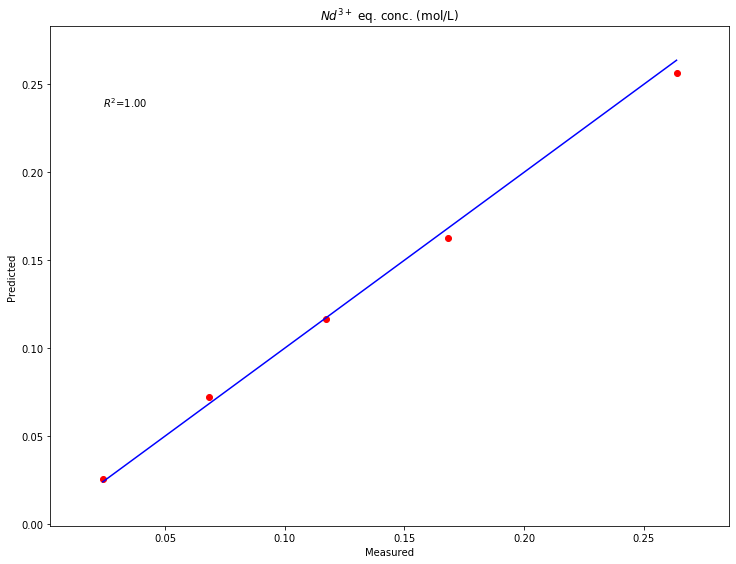

(<Figure size 743.226x572.185 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x278e4f1df48>)

In [8]:
estimator.parity_plot("Nd_aq_eq", print_r_squared=True)

We can also find what the r-squared value is. The closer to 1, the better the prediction model.

In [10]:
print(estimator.r_squared())

0.9970803631106648


Yay! Good job! That is an amazing fit.